# Topic Tags

In [182]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import json

from topic_modeling import TopicModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read in latest data and be sure to apply the right index.

In [94]:
file_name = 'amis_final_data/amis_articles_27_11_2016_indexed.jsonl'

with open(file_name) as f:
    articles = pd.DataFrame(json.loads(line) for line in f)

articles['date'] = pd.to_datetime(articles['date'])
articles = articles.set_index(articles.id)

Create a Topic Model instance, this will store all the important info (WIP: some of this code ain't the cleanest...)

In [99]:
model = TopicModel()

Featurize the corpus and fit the model (Warning, this takes a long time...)

In [100]:
model.featurize(articles['article'])

In [101]:
model.fit()

Extract the topics, defaulst to 100 topics, but you can extract a different number  (if you pre-computed them using `fit`)

In [143]:
model.get_topics()

The two closest Topics have a cosine similarity of 0.645088826384

Topic 1: Topic #7: inflation participants rate term policy economic labor longer conditions federal

Topic 2: Topic #40: rate rates inflation central low cut month monetary increase benchmark


The topics loadings can be extracted as 

In [144]:
model.nmf_documents_topics.head(5)

,wheat coffee futures,statement interview said,fell rose percent,binding targets target,forecast wheat bushels,renewable efficiency energy,revenue euros billion,rate participants inflation,eurozone greek debt,think just like,...,court case law,talks negotiations accession,vice political president,funding innovation research,demand global growth,jobs work workers,grain businesses business,told ministers meeting,cane production sugar,attacks military security
id,,,,,,,,,,,,,,,,,,,,,
a00000000,10.391644,135.529953,37.907539,13.979411,1.774950,3.381151,2.432274,16.394657,5.427907,8.464828,...,8.996598,50.376006,11.619820,6.836323,0.491276,4.077549,2.230579,21.589286,3.288034,10.693844
a00000001,10.391644,135.529953,37.907539,13.979411,1.774950,3.381151,2.432274,16.394657,5.427907,8.464828,...,8.996598,50.376006,11.619820,6.836323,0.491276,4.077549,2.230579,21.589286,3.288034,10.693844
a00000002,30.116892,0.792443,0.810883,7.760139,0.238153,4.408299,1.925476,8.890564,4.686337,27.060241,...,17.613846,62.637141,11.646770,10.593353,2.674056,5.878995,2.099616,14.459336,2.302758,15.783016
a00000003,30.116892,0.792443,0.810883,7.760139,0.238153,4.408299,1.925476,8.890564,4.686337,27.060241,...,17.613846,62.637141,11.646770,10.593353,2.674056,5.878995,2.099616,14.459336,2.302758,15.783016
a00000004,31.013783,0.136388,0.236174,11.540997,0.184922,2.191176,2.194921,3.183316,2.068265,10.822473,...,4.928578,20.783026,1.856318,4.969846,0.174346,3.130725,0.962293,13.787760,0.673098,7.584772


Try to group together the topics

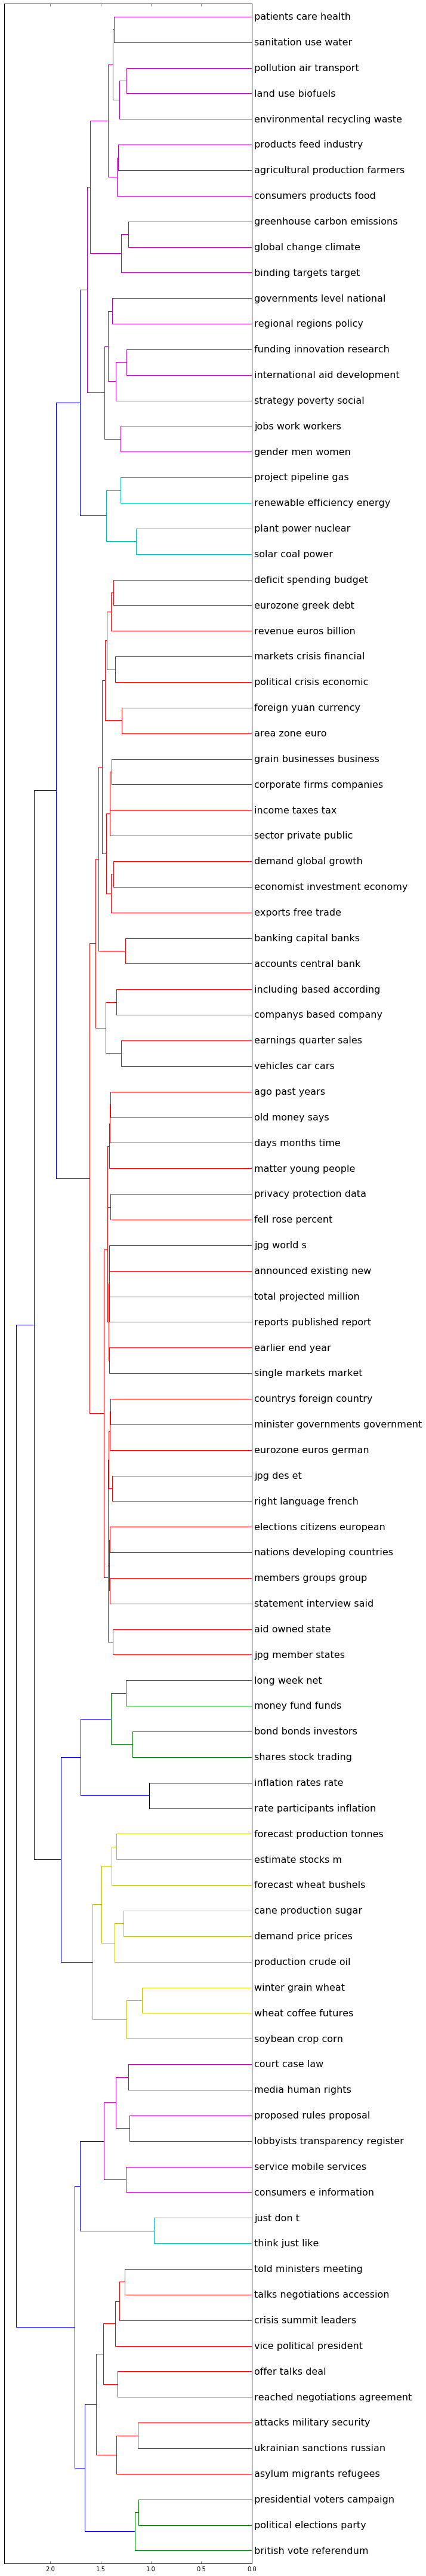

In [153]:
model.cluster_topics(plot=True, save_fig=False)

Prune the dendrogram

In [194]:
print sp.cluster.hierarchy.fcluster(model.linkage_matrix, t=1.12).max()

cluster_assignments = sp.cluster.hierarchy.fcluster(model.linkage_matrix, t=1.12)

dict([[x,list(cluster_assignments).count(x)] for x in set(cluster_assignments)])

18


{1: 3,
 2: 3,
 3: 2,
 4: 4,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 3,
 10: 3,
 11: 3,
 12: 6,
 13: 11,
 14: 2,
 15: 4,
 16: 6,
 17: 20,
 18: 22}

Group loadings by cluster

In [193]:
# added this later, no time to re-train everything, doing it live
# model.prune_dendrogram(t=1.2)
model.clustered_topics = model.nmf_documents_topics.apply(lambda x: x.groupby(cluster_assignments).mean(), axis=1)

In [167]:
model.nmf_documents_topics.head(5)

,wheat coffee futures,statement interview said,fell rose percent,binding targets target,forecast wheat bushels,renewable efficiency energy,revenue euros billion,rate participants inflation,eurozone greek debt,think just like,...,court case law,talks negotiations accession,vice political president,funding innovation research,demand global growth,jobs work workers,grain businesses business,told ministers meeting,cane production sugar,attacks military security
id,,,,,,,,,,,,,,,,,,,,,
a00000000,10.391644,135.529953,37.907539,13.979411,1.774950,3.381151,2.432274,16.394657,5.427907,8.464828,...,8.996598,50.376006,11.619820,6.836323,0.491276,4.077549,2.230579,21.589286,3.288034,10.693844
a00000001,10.391644,135.529953,37.907539,13.979411,1.774950,3.381151,2.432274,16.394657,5.427907,8.464828,...,8.996598,50.376006,11.619820,6.836323,0.491276,4.077549,2.230579,21.589286,3.288034,10.693844
a00000002,30.116892,0.792443,0.810883,7.760139,0.238153,4.408299,1.925476,8.890564,4.686337,27.060241,...,17.613846,62.637141,11.646770,10.593353,2.674056,5.878995,2.099616,14.459336,2.302758,15.783016
a00000003,30.116892,0.792443,0.810883,7.760139,0.238153,4.408299,1.925476,8.890564,4.686337,27.060241,...,17.613846,62.637141,11.646770,10.593353,2.674056,5.878995,2.099616,14.459336,2.302758,15.783016
a00000004,31.013783,0.136388,0.236174,11.540997,0.184922,2.191176,2.194921,3.183316,2.068265,10.822473,...,4.928578,20.783026,1.856318,4.969846,0.174346,3.130725,0.962293,13.787760,0.673098,7.584772


In [189]:
model.clustered_topics.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
id,,,,,,,,,,,,,,,,,,
a00000000,42.384399,42.038982,29.635461,93.857369,12.085176,34.434860,91.973830,17.574302,26.396359,14.409533,8.435933,56.223308,316.487822,2.007608,103.635771,56.598355,152.102028,333.579987
a00000001,42.384399,42.038982,29.635461,93.857369,12.085176,34.434860,91.973830,17.574302,26.396359,14.409533,8.435933,56.223308,316.487822,2.007608,103.635771,56.598355,152.102028,333.579987
a00000002,55.863671,61.929260,23.474321,99.397855,38.918027,26.675458,61.612080,40.857608,46.797418,8.559890,3.448734,51.714914,389.624467,1.888828,9.502083,56.686972,153.682846,592.700979
a00000003,55.863671,61.929260,23.474321,99.397855,38.918027,26.675458,61.612080,40.857608,46.797418,8.559890,3.448734,51.714914,389.624467,1.888828,9.502083,56.686972,153.682846,592.700979
a00000004,31.266797,33.974623,5.525715,45.521424,13.390796,4.821800,17.604195,12.447205,33.068207,1.051506,3.751083,8.900443,230.387710,0.301180,46.488966,76.081760,34.715463,102.912222
